# Load Data

In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('./Data/dataset_bbl.csv')
features.head(5)

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,Flavonoid
0,1.071888,0.972967,0.927259,0.859528,0.814563,0.732133,0.705139,0.639593,0.612300,0.577846,...,0.944192,0.943166,0.944745,0.949579,0.947775,0.945135,0.947778,0.944521,0.947320,113.696809
1,1.098594,0.972958,0.915506,0.869775,0.816965,0.743328,0.700581,0.646832,0.618049,0.575018,...,0.953284,0.949595,0.953124,0.956915,0.956758,0.955178,0.956805,0.951367,0.954016,113.696809
2,1.107632,0.992840,0.943511,0.872657,0.826729,0.741778,0.702973,0.648001,0.607790,0.564421,...,0.954838,0.955897,0.954529,0.957953,0.959852,0.958183,0.958329,0.957853,0.960923,113.696809
3,1.090357,0.987339,0.933168,0.857207,0.813601,0.746898,0.707530,0.649270,0.603117,0.556855,...,0.948010,0.948768,0.950237,0.953377,0.952253,0.952072,0.951327,0.952926,0.955212,113.696809
4,1.111850,0.977303,0.935073,0.881331,0.820806,0.751077,0.704687,0.657196,0.604151,0.562535,...,0.958448,0.957239,0.961563,0.960730,0.963971,0.961986,0.963846,0.960431,0.962135,113.696809


In [2]:
features.shape

(738, 225)

# Data Preparation

## Features and Targets

In [3]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = features.iloc[:, -1]
#labels = pd.read_csv('Flavonoid_Batch_1_5ml.csv', names=['Flavonoid'])
#labels = np.array(labels)

# Remove the labels from the features
# axis 1 refers to the columns
features= features.iloc[:, :-1]
OUTPUT_PATH = 'Output/Result/'

In [4]:
features.shape

(738, 224)

## Training and Testing Sets CV

In [6]:
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1506669923)

k_fold = KFold(n_splits=5, shuffle=True)
n_fold=5

explained_train = np.zeros(n_fold)
explained_test = np.zeros(n_fold)
rmse_train = np.zeros(n_fold)
rmse_test  = np.zeros(n_fold)
r2_train   = np.zeros(n_fold)
r2_test    = np.zeros(n_fold)
rpd_train  = np.zeros(n_fold)
rpd_test   = np.zeros(n_fold)
mae_train = np.zeros(n_fold)
mae_test = np.zeros(n_fold)

for k, (train, test) in enumerate(k_fold.split(features, labels)):
    train_X, train_y = features.iloc[train], labels.iloc[train]
    test_X, test_y = features.iloc[test], labels.iloc[test]
#    print('Train:', train, 'Test:', test)
    
    rf.fit(train_X, train_y)
    pred_train = rf.predict(train_X)
    explained_train[k] = explained_variance_score(train_y, pred_train)
    rmse_train[k] = np.sqrt(mean_squared_error(train_y, pred_train))
    r2_train[k] = rf.score(train_X, train_y)
    rpd_train[k] = train_y.std()/rmse_train[k]
    mae_train[k] = mean_absolute_error(train_y, pred_train)
    
    pred_test = rf.predict(test_X)
    explained_test[k] = explained_variance_score(test_y, pred_test)
    rmse_test[k] = np.sqrt(mean_squared_error(test_y, pred_test))
    r2_test[k] = rf.score(test_X, test_y)
    rpd_test[k] = test_y.std()/rmse_test[k]
    mae_test[k] = mean_absolute_error(test_y, pred_test)
    
score_table = pd.DataFrame([explained_train, explained_test, rmse_train, rmse_test, r2_train, r2_test, rpd_train, rpd_test, mae_train, mae_test]).transpose()
score_table.columns = ['Explained variance_Train','Explained variance_Test','RMSE_train','RMSE_test','R2_train','R2_test','RPD_train','RPD_test','MAE_train','MAE_test']

mean_score =  pd.DataFrame(score_table.mean()).transpose()
mean_score.index = ['Average']
score_table = pd.concat([score_table,mean_score])
score_table.to_csv(OUTPUT_PATH+'CrossVal_base.csv')
(score_table)

,Explained variance_Train,Explained variance_Test,RMSE_train,RMSE_test,R2_train,R2_test,RPD_train,RPD_test,MAE_train,MAE_test
0,0.983759,0.897896,7.415843,19.061437,0.983754,0.897010,7.852356,3.126622,4.497472,12.024475
1,0.982878,0.934594,7.647587,14.983342,0.982875,0.934439,7.648029,3.918765,4.514547,10.222990
2,0.984830,0.872785,7.308577,19.741459,0.984819,0.869530,8.123042,2.777900,4.338821,12.329586
3,0.984169,0.941231,7.388474,14.081114,0.984163,0.939895,7.953001,4.092852,4.451040,9.934458
4,0.987087,0.843029,6.545914,24.448830,0.987084,0.841547,8.806558,2.520766,4.116352,14.655609
Average,0.984545,0.897907,7.261279,18.463236,0.984539,0.896484,8.076597,3.287381,4.383646,11.833424


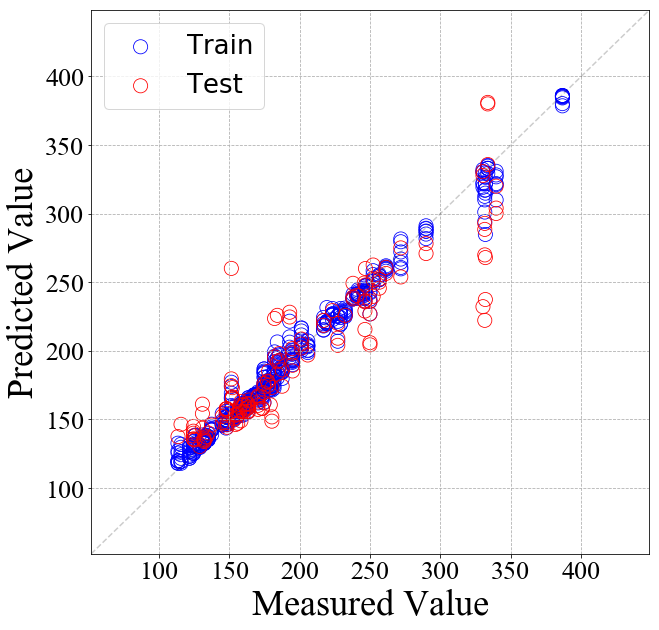

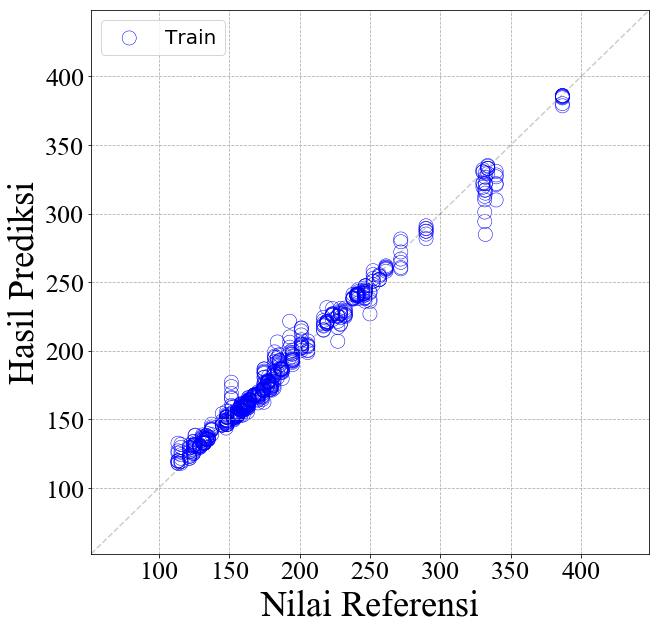

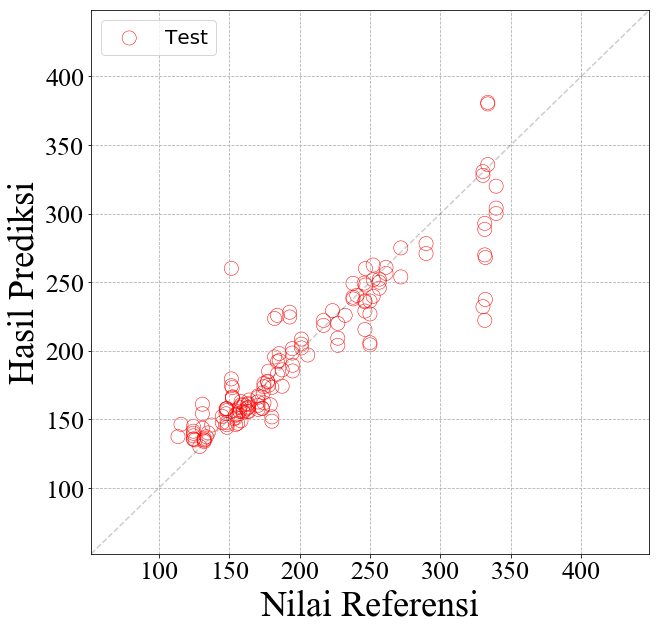

In [8]:
CSFONT_LABEL = {'fontname':'Times New Roman', 'fontsize': 36}
CSFONT_TICKS = {'fontname':'Times New Roman', 'fontsize': 26}
CSFONT_R = {'fontname':'Times New Roman', 'fontsize': 24}

import matplotlib.pyplot as plt

min_val = min(train_y.describe()['min'], test_y.describe()['min'])
max_val = max(train_y.describe()['max'], test_y.describe()['max'])
std_val = max(train_y.describe()['std'], test_y.describe()['std'])
lower_limit = min_val-std_val
upper_limit = max_val+std_val

#plot train test
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.001)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(train_y, rf.predict(train_X), label='Train', facecolors='none', edgecolors='b', linewidths=0.8, s=200)
plt.scatter(test_y, rf.predict(test_X), label='Test', facecolors='none', edgecolors='r', linewidths=0.8, s=200)
plt.xlabel('Measured Value', **CSFONT_LABEL)
plt.ylabel('Predicted Value', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
# plt.title('Hasil Pemodelan')
plt.legend(fontsize=26)
plt.grid(linestyle='--')
filename = 'fit_regress'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

#plot train
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.01)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(train_y, rf.predict(train_X), label='Train', facecolors='none', edgecolors='b', linewidths=0.5, s=200)
plt.xlabel('Nilai Referensi', **CSFONT_LABEL)
plt.ylabel('Hasil Prediksi', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
plt.grid(linestyle='--')
# plt.title('Hasil Pemodelan (Train)')
plt.legend(fontsize=20)
filename = 'fit_regress_train'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

#plot test
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.01)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(test_y, rf.predict(test_X), label='Test', facecolors='none', edgecolors='r', linewidths=0.5, s=200)
plt.xlabel('Nilai Referensi', **CSFONT_LABEL)
plt.ylabel('Hasil Prediksi', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
plt.grid(linestyle='--')
# plt.title('Hasil Pemodelan (Test)')
plt.legend(fontsize=20)
filename = 'fit_regress_test'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

# Variable Importances

In [9]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# Saving feature names for later use
feature_list = list(features.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 421.24               Importance: 0.11
Variable: 737.25               Importance: 0.105
Variable: 745.45               Importance: 0.093
Variable: 739.98               Importance: 0.079
Variable: 742.72               Importance: 0.074
Variable: 729.06               Importance: 0.044
Variable: 748.19               Importance: 0.038
Variable: 750.93               Importance: 0.038
Variable: 734.52               Importance: 0.034
Variable: 731.79               Importance: 0.031
Variable: 726.33               Importance: 0.023
Variable: 753.66               Importance: 0.022
Variable: 402.9                Importance: 0.019
Variable: 397.66               Importance: 0.017
Variable: 400.28               Importance: 0.015
Variable: 416                  Importance: 0.015
Variable: 413.37               Importance: 0.011
Variable: 972.84               Importance: 0.009
Variable: 463.34               Importance: 0.008
Variable: 723.6                Importance: 0.008
Variable: 405.52     

In [15]:
import numpy as np
np.savetxt(OUTPUT_PATH+"feature_importances.csv", feature_importances, delimiter=",", fmt='%s')

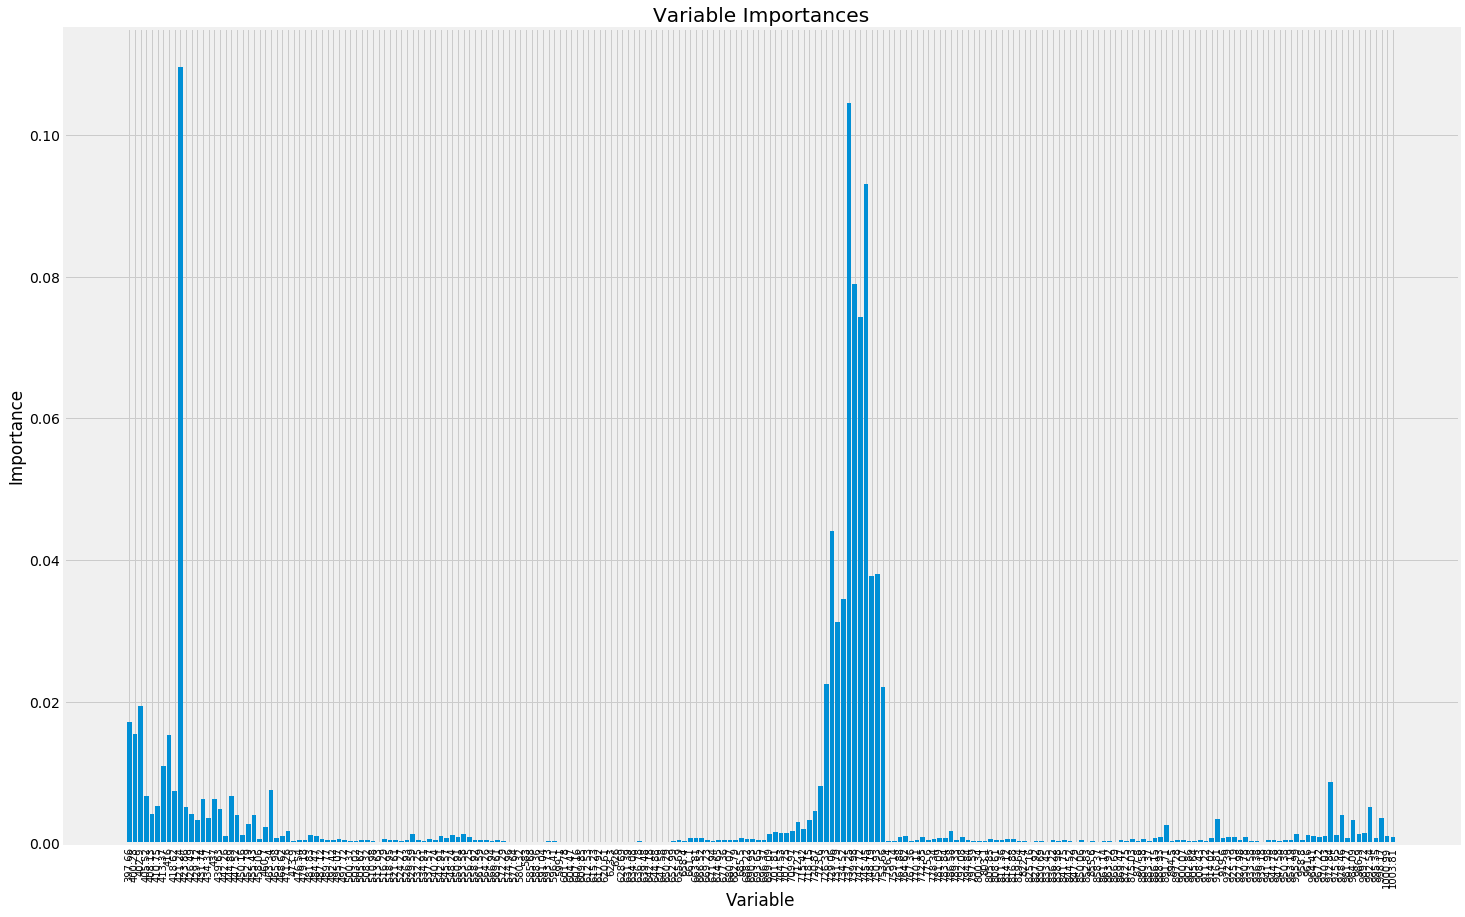

In [10]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(25,15))
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
ax = plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=10)
#plt.xlabel('xlabel', fontsize=8)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
#ax.set_yticklabels(SPECTRAL_LABELS)
plt.savefig('feature_selection'+'.svg',format='svg')
plt.savefig('feature_selection'+'.png',dpi=600)

# Using feature Selection

In [14]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=1506669923)

# Extract the two most important features
important_indices = [feature_list.index('421.24'), feature_list.index('737.25'),
                    feature_list.index('745.45'), feature_list.index('739.98'),
                    feature_list.index('742.72'), feature_list.index('729.06'),
                    feature_list.index('748.19'), feature_list.index('750.93'),
                    feature_list.index('734.52'), feature_list.index('731.79'),
                    feature_list.index('726.33'), feature_list.index('753.66'),
                    feature_list.index('402.9'), feature_list.index('397.66'),
                    feature_list.index('400.28'), feature_list.index('416'),
                    feature_list.index('413.37'), feature_list.index('972.84'),
                    feature_list.index('463.34'), feature_list.index('723.6'),
                    feature_list.index('405.52'), feature_list.index('418.62'),
                    feature_list.index('444.89'), feature_list.index('431.74'),
                    feature_list.index('437'), feature_list.index('410.75'),
                    feature_list.index('423.86'), feature_list.index('439.63'),
                    feature_list.index('720.87'), feature_list.index('992.54'),
                    feature_list.index('408.13'), feature_list.index('426.49'),
                    feature_list.index('434.37'), feature_list.index('447.52')]
#                     feature_list.index('455.43'), feature_list.index('978.46'),
#                     feature_list.index('998.17'), feature_list.index('429.12'),
#                     feature_list.index('452.79'), feature_list.index('712.7'),
#                     feature_list.index('718.15'), feature_list.index('891.71'),
#                     feature_list.index('916.81'), feature_list.index('984.09'),
#                     feature_list.index('460.7'), feature_list.index('471.26'),
#                     feature_list.index('701.81'), feature_list.index('704.53'),
#                     feature_list.index('709.97'), feature_list.index('715.42'),
#                     feature_list.index('786.58'), feature_list.index('442.26'),
#                     feature_list.index('450.16'), feature_list.index('458.06')]

train_features_nparr = np.array(train_X)
test_features_nparr = np.array(test_X)

train_important = train_features_nparr[:, important_indices]
test_important = test_features_nparr[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_y)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_y)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 14.51 degrees.
Accuracy: 92.94 %.


In [15]:
k_fold = KFold(n_splits=5, shuffle=True)
n_fold=5

explained_train = np.zeros(n_fold)
explained_test = np.zeros(n_fold)
rmse_train = np.zeros(n_fold)
rmse_test  = np.zeros(n_fold)
r2_train   = np.zeros(n_fold)
r2_test    = np.zeros(n_fold)
rpd_train  = np.zeros(n_fold)
rpd_test   = np.zeros(n_fold)
mae_train = np.zeros(n_fold)
mae_test = np.zeros(n_fold)

for k, (train, test) in enumerate(k_fold.split(features, labels)):
    X_train, y_train = features.iloc[train], labels.iloc[train]
    X_test, y_test = features.iloc[test], labels.iloc[test]
#    print('Train:', train, 'Test:', test)
    
    train_features_nparr = np.array(X_train)
    test_features_nparr = np.array(X_test)

    train_important = train_features_nparr[:, important_indices]
    test_important = test_features_nparr[:, important_indices]
    
    rf_most_important.fit(train_important, y_train)
    pred_train = rf_most_important.predict(train_important)
    explained_train[k] = explained_variance_score(y_train, pred_train)
    rmse_train[k] = np.sqrt(mean_squared_error(y_train, pred_train))
    r2_train[k] = rf_most_important.score(train_important, y_train)
    rpd_train[k] = y_train.std()/rmse_train[k]
    mae_train[k] = mean_absolute_error(y_train, pred_train)
    
    pred_test = rf_most_important.predict(test_important)
    explained_test[k] = explained_variance_score(y_test, pred_test)
    rmse_test[k] = np.sqrt(mean_squared_error(y_test, pred_test))
    r2_test[k] = rf_most_important.score(test_important, y_test)
    rpd_test[k] = test_y.std()/rmse_test[k]
    mae_test[k] = mean_absolute_error(y_test, pred_test)
    
score_table = pd.DataFrame([explained_train, explained_test, rmse_train, rmse_test, r2_train, r2_test, rpd_train, rpd_test, mae_train, mae_test]).transpose()
score_table.columns = ['Explained variance_Train','Explained variance_Test','RMSE_train','RMSE_test','R2_train','R2_test','RPD_train','RPD_test','MAE_train','MAE_test']

mean_score =  pd.DataFrame(score_table.mean()).transpose()
mean_score.index = ['Average']
score_table = pd.concat([score_table,mean_score])
score_table.to_csv(OUTPUT_PATH+'CrossVal_Using_Feature_selection.csv')
(score_table)

,Explained variance_Train,Explained variance_Test,RMSE_train,RMSE_test,R2_train,R2_test,RPD_train,RPD_test,MAE_train,MAE_test
0,0.984156,0.905808,7.318163,18.359279,0.984156,0.905179,7.951223,3.356873,4.415742,11.986942
1,0.985107,0.875983,7.234146,19.437441,0.985099,0.875552,8.199047,3.170673,4.321849,12.167264
2,0.986294,0.912054,6.856771,17.733832,0.986293,0.905688,8.548576,3.475265,4.340490,11.390577
3,0.985981,0.928499,6.869759,16.057879,0.985979,0.928496,8.452398,3.837977,4.279901,10.513909
4,0.985328,0.899131,7.059579,18.798421,0.985328,0.899088,8.262617,3.278454,4.231803,11.570471
Average,0.985373,0.904295,7.067683,18.077371,0.985371,0.902800,8.282772,3.423848,4.317957,11.525832


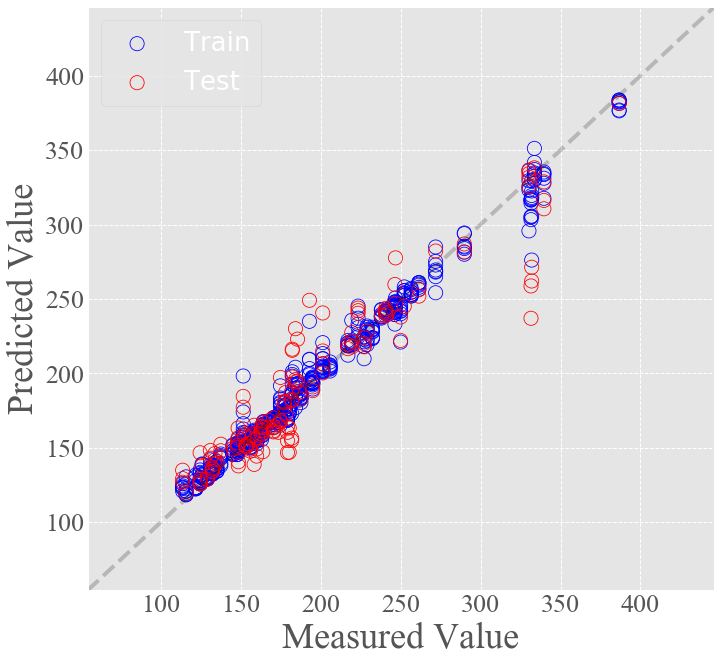

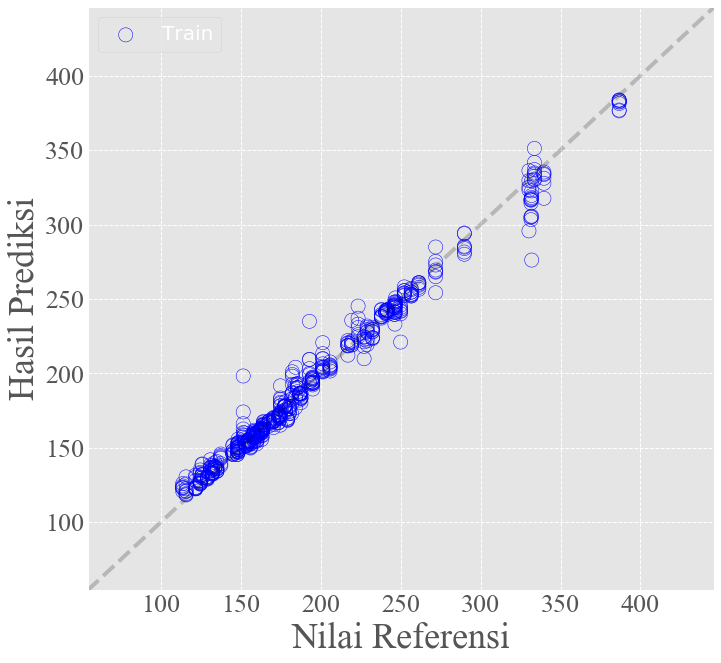

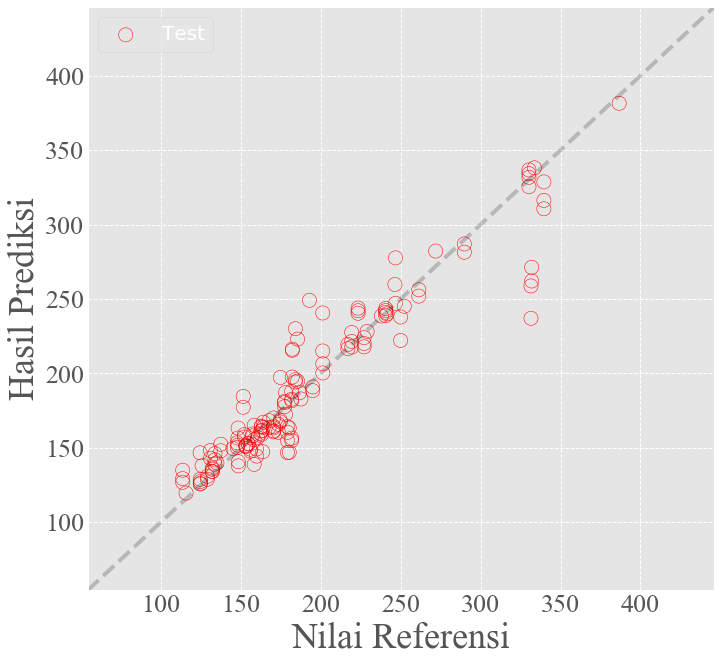

In [30]:
CSFONT_LABEL = {'fontname':'Times New Roman', 'fontsize': 36}
CSFONT_TICKS = {'fontname':'Times New Roman', 'fontsize': 26}
CSFONT_R = {'fontname':'Times New Roman', 'fontsize': 24}

min_val = min(y_train.describe()['min'], y_test.describe()['min'])
max_val = max(y_train.describe()['max'], y_test.describe()['max'])
std_val = max(y_train.describe()['std'], y_test.describe()['std'])
lower_limit = min_val-std_val
upper_limit = max_val+std_val

#plot train test
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.001)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(y_train, rf_most_important.predict(train_important), label='Train', facecolors='none', edgecolors='b', linewidths=0.8, s=200)
plt.scatter(y_test, rf_most_important.predict(test_important), label='Test', facecolors='none', edgecolors='r', linewidths=0.8, s=200)
plt.xlabel('Measured Value', **CSFONT_LABEL)
plt.ylabel('Predicted Value', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
# plt.title('Hasil Pemodelan')
plt.legend(fontsize=26)
plt.grid(linestyle='--')
filename = 'fit_regress_Feature'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

#plot train
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.01)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(y_train, rf_most_important.predict(train_important), label='Train', facecolors='none', edgecolors='b', linewidths=0.5, s=200)
plt.xlabel('Nilai Referensi', **CSFONT_LABEL)
plt.ylabel('Hasil Prediksi', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
plt.grid(linestyle='--')
# plt.title('Hasil Pemodelan (Train)')
plt.legend(fontsize=20)
filename = 'fit_regress_train_Feature'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

#plot test
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.01)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(y_test, rf_most_important.predict(test_important), label='Test', facecolors='none', edgecolors='r', linewidths=0.5, s=200)
plt.xlabel('Nilai Referensi', **CSFONT_LABEL)
plt.ylabel('Hasil Prediksi', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
plt.grid(linestyle='--')
# plt.title('Hasil Pemodelan (Test)')
plt.legend(fontsize=20)
filename = 'fit_regress_test_Feature'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')